In [2]:
import numpy as np
import pandas as pd
import pylab as pl
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import seaborn as sns


In [3]:
df=pd.read_csv("ORGANICS.csv",encoding="cp1251",delimiter = ',')
df

,ID,DemAffl,DemAge,DemCluster,DemClusterGroup,DemGender,DemReg,DemTVReg,PromClass,PromSpend,PromTime,TargetBuy,TargetAmt
0,140,10.0,76.0,16.0,C,U,Midlands,Wales & West,Gold,16000.00,4.0,0,0
1,620,4.0,49.0,35.0,D,U,Midlands,Wales & West,Gold,6000.00,5.0,0,0
2,868,5.0,70.0,27.0,D,F,Midlands,Wales & West,Silver,0.02,8.0,1,1
3,1120,10.0,65.0,51.0,F,M,Midlands,Midlands,Tin,0.01,7.0,1,1
4,2313,11.0,68.0,4.0,A,F,Midlands,Midlands,Tin,0.01,8.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22218,52834058,13.0,65.0,9.0,B,F,South East,London,Silver,1500.00,5.0,0,0
22219,52834376,15.0,73.0,34.0,D,U,South East,S & S East,Gold,6053.06,12.0,0,0
22220,52837057,9.0,70.0,15.0,B,F,North,Yorkshire,Gold,6000.00,5.0,0,0
22221,52838096,11.0,66.0,8.0,B,F,North,N West,Silver,5000.00,5.0,0,0


In [4]:
print(df.shape) 
print(df.info())

(22223, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22223 entries, 0 to 22222
Data columns (total 13 columns):
ID                 22223 non-null int64
DemAffl            21138 non-null float64
DemAge             20715 non-null float64
DemCluster         21549 non-null float64
DemClusterGroup    21549 non-null object
DemGender          19711 non-null object
DemReg             21758 non-null object
DemTVReg           21758 non-null object
PromClass          22223 non-null object
PromSpend          22223 non-null float64
PromTime           21942 non-null float64
TargetBuy          22223 non-null int64
TargetAmt          22223 non-null int64
dtypes: float64(5), int64(3), object(5)
memory usage: 2.2+ MB
None


In [5]:
df = df.fillna(0)

In [6]:
df.isnull().any().any()

False

In [7]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier

In [8]:
X=df[['DemAffl',  'DemAge', 'DemCluster', 'PromSpend', 'PromTime']]
y=df.values[::,11]
X,y
y = y.astype('int')

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [10]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [61]:
from sklearn.tree import export_graphviz

import subprocess

export_graphviz(tree, out_file='OrganicsTree.dot', 
               rounded = True, proportion = False, 
                precision = 2, filled = True)

import pydot 
(graph, ) = pydot.graph_from_dot_file('OrganicsTree.dot')

graph.write_png('OrganicsTree.png')


In [11]:
tree.score(X_train, y_train) 

0.7962201079969143

In [12]:
tree.score(X_test,y_test) 

0.7943602819859007

In [13]:
from sklearn.tree import DecisionTreeClassifier
tree1 = DecisionTreeClassifier(criterion = 'entropy', max_depth=5, random_state=0)
tree1.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [57]:
from sklearn.tree import export_graphviz

import subprocess

export_graphviz(tree1, out_file='OrganicsHW.dot', 
rounded = True, proportion = False, 
                precision = 2, filled = True)
(graph, ) = pydot.graph_from_dot_file('OrganicsHW.dot')

graph.write_png('OrganicsHW.png')

In [14]:
tree.score(X_train, y_train) 

0.7962201079969143

In [15]:
tree.score(X_test,y_test) 

0.7943602819859007

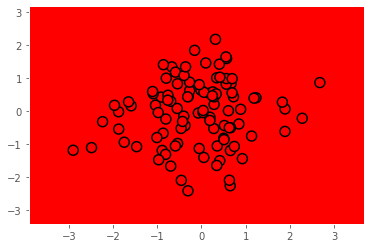

In [39]:
def get_grid(data):
    X_min, X_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(X_min, X_max, 0.01), np.arange(y_min, y_max, 0.01))

X = df[['DemAffl', 'DemAge']]
y = df.values[::,11]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
tree1 = DecisionTreeClassifier(criterion = 'entropy', max_depth=10, random_state=17)
y_train = y_train.astype(int)
tree1.fit(X_train, y_train)

XX, yy = get_grid(train_data)
predicted = clf_tree.predict(np.c_[XX.ravel(), yy.ravel()]).reshape(XX.shape)
plt.pcolormesh(XX, yy, predicted, cmap='autumn')
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, 
cmap='autumn', edgecolors='black', linewidth=1.5);